In [1]:
import gym
from gym import logger as gymlogger
gymlogger.set_level(40)

import numpy as np
from collections import namedtuple, deque

from IPython import display
import matplotlib.pyplot as plt

from agent import *

In [2]:
env = gym.make('CartPole-v0')
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (4,)
Number of actions:  2


In [116]:
def collect_trajectory(env, agent, tmax = 1000):
    agent.policy.eval()

    reward_list = []
    log_prob_list = []
    
    state = env.reset()
    for t in range(tmax):
        action, log_prob = agent.act(state)
        state, reward, done, _ = env.step(action)
        reward_list.append(reward)
        log_prob_list.append(log_prob)
        if done:
            break

    return reward_list, log_prob_list



In [119]:
gamma**np.arange(T)

array([1.        , 0.9       , 0.81      , 0.729     , 0.6561    ,
       0.59049   , 0.531441  , 0.4782969 , 0.43046721, 0.38742049,
       0.34867844, 0.3138106 , 0.28242954, 0.25418658, 0.22876792])

In [120]:
T = len(reward_list)
discounts = gamma**np.arange(T)
R = sum(reward_list*discounts)

In [63]:
Rt

0

In [126]:
log_prob_list*R

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [127]:
print_every = 100
NUM_EPISODES = 1000
TMAX = 1000
gamma = 0.9

agent = Agent(4, 16, 2)

scores = deque(maxlen = 100)
score_list = []

for e in range(1, NUM_EPISODES+1):
    # collect a trajectory
    reward_list, log_prob_list = collect_trajectory(env, agent, tmax = TMAX)
            
    # compute loss
    T = len(reward_list)
    discounts = gamma**np.arange(T)
    R = sum(reward_list*discounts)
    policy_loss = []
    for log_prob in log_probs:
        policy_loss.append(-log_prob * R)
    policy_loss = torch.cat(policy_loss).sum()
    
    # update network 
    agent.optimizer.zero_grad()
    policy_loss.backward()
    agent.optimizer.step()
    
    
    score_list.append(sum(reward_list))
    scores.append(sum(reward_list))
    
    if e % 100 == 0:
        print('Episode {}\t average score {:.2f}'.format(e,np.mean(scores)))
    

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

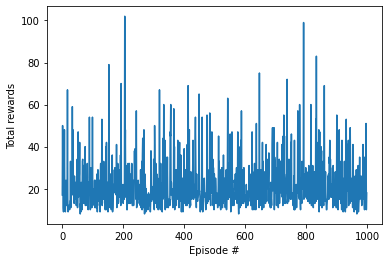

In [112]:
fig = plt.figure()
plt.plot(np.arange(len(score_list)), score_list)
plt.ylabel('Total rewards')
plt.xlabel('Episode #')
plt.show()

In [48]:
print_every = 100
NUM_EPISODES = 1000
TMAX = 1000
gamma = 1.0

agent = Agent(4, 16, 2)

scores = deque(maxlen = 100)
score_list = []

for e in range(1, NUM_EPISODES+1):
    # collect a trajectory
    rewards = []
    log_probs = []
    state = env.reset()
    for t in range(TMAX):
        action, log_prob = agent.act(state)
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        log_probs.append(log_prob)
        if done:
            T=t
            break
            
            
    score_list.append(sum(rewards))
    scores.append(sum(rewards))
    # compute loss

    policy_loss = []
    for t,log_prob in enumerate(log_probs):
        discounts = [gamma**(tp-t) for tp in range(t,T)]
        Rt = sum([a*b for a,b in zip(discounts, rewards[t:])])
        policy_loss.append(-log_prob * Rt)
    policy_loss = torch.cat(policy_loss).sum()
    
    # update network 
    agent.optimizer.zero_grad()
    policy_loss.backward()
    agent.optimizer.step()
    
    if e % 100 == 0:
        print('Episode {}\t average score {:.2f}'.format(e,np.mean(scores)))
    

Episode 100	 average score 54.87
Episode 200	 average score 148.11
Episode 300	 average score 142.41
Episode 400	 average score 120.69
Episode 500	 average score 90.93
Episode 600	 average score 149.56
Episode 700	 average score 153.63
Episode 800	 average score 171.80
Episode 900	 average score 197.82
Episode 1000	 average score 185.44


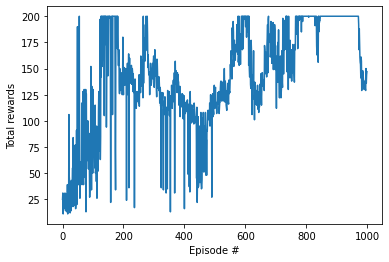

In [49]:
fig = plt.figure()
plt.plot(np.arange(len(score_list)), score_list)
plt.ylabel('Total rewards')
plt.xlabel('Episode #')
plt.show()

In [58]:
T = len(reward_list)
T

21

In [92]:
gamma = 1

In [93]:
# reward to go
for t,log_prob in enumerate(log_prob_list):
    discounts = [gamma**(tp-t) for tp in range(t,T)]
    Rt = sum([a*b for a,b in zip(discounts, reward_list[t:])])
    print(Rt)
   

21.0
20.0
19.0
18.0
17.0
16.0
15.0
14.0
13.0
12.0
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0


In [97]:
T = len(reward_list)
discounts = gamma**np.arange(T)
rewards = np.asarray(reward_list)*discounts[:] # element- wise multiplay
rewards_future = rewards[::-1].cumsum(axis=0)[::-1]

In [98]:
np.asarray(reward_list).shape

(21,)

In [109]:
a = np.asarray([1,2,3,4])
b = np.asarray([2,2,1,1])
a*b

array([2, 4, 3, 4])

In [118]:
np.arange(T)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
 T = len(reward_list)
    # discounted reward to go ???
    discounts = gamma**np.arange(T)
    rewards = np.asarray(reward_list)*discounts[:,np.newaxis]
    rewards_future = rewards[::-1].cumsum(axis=0)[::-1]
    # reward normalization
    mean = np.mean(rewards_future, axis=1)
    std = np.std(rewards_future, axis=1) + 1.0e-10
    rewards_normalized = (rewards_future - mean[:,np.newaxis])/std[:,np.newaxis]
    
    rewards = torch.tensor(rewards_normalized).float().to(device) 